In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2

In [2]:
with open('/data/wadld/data/preprocessed_data/binarized.pkl', 'rb') as f:
    data = pickle.load(f)
Vs, Es = data['V'], data['E']

In [3]:
def draw_g(V, E, boundary=100, color=(255, 255, 255), thickness=8):
    min_x, min_y = V.min(0)
    max_x, max_y = V.max(0)
    arr = np.zeros((
        int(max_x - min_x) + (2 * boundary),
        int(max_y - min_y) + (2 * boundary),
        3
    ))
    min_point = np.array([min_x, min_y])
    V = (V - min_point).astype(np.int)
    Eai, Ebi = np.where(E)
    for ei in range(len(Eai)):
        vx_a = tuple(V[Eai[ei]].tolist())
        vx_b = tuple(V[Ebi[ei]].tolist())
        cv2.line(arr, vx_a, vx_b, color, thickness=thickness)
    return arr


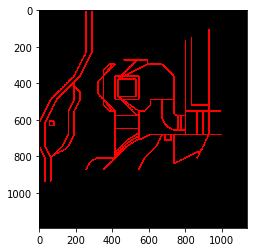

In [6]:
ei = 1
img = draw_g(Vs[ei], Es[ei], color=(255, 0, 0))
plt.imshow(img / 255)

In [5]:
Vs[0].shape

(124, 2)

In [8]:
x = np.random.randn(10, 64, 64)

In [17]:
np.abs(((x - x.mean(0)) / (x.std(0) + 1e-8)).mean(0)).std()

3.861645901968864e-17